# Foundations of Statistical Analysis  Machine Leaning - Part 2
## Dr Christine Malot

# Day 1

## Example 1.1 - Importance of the number of observations

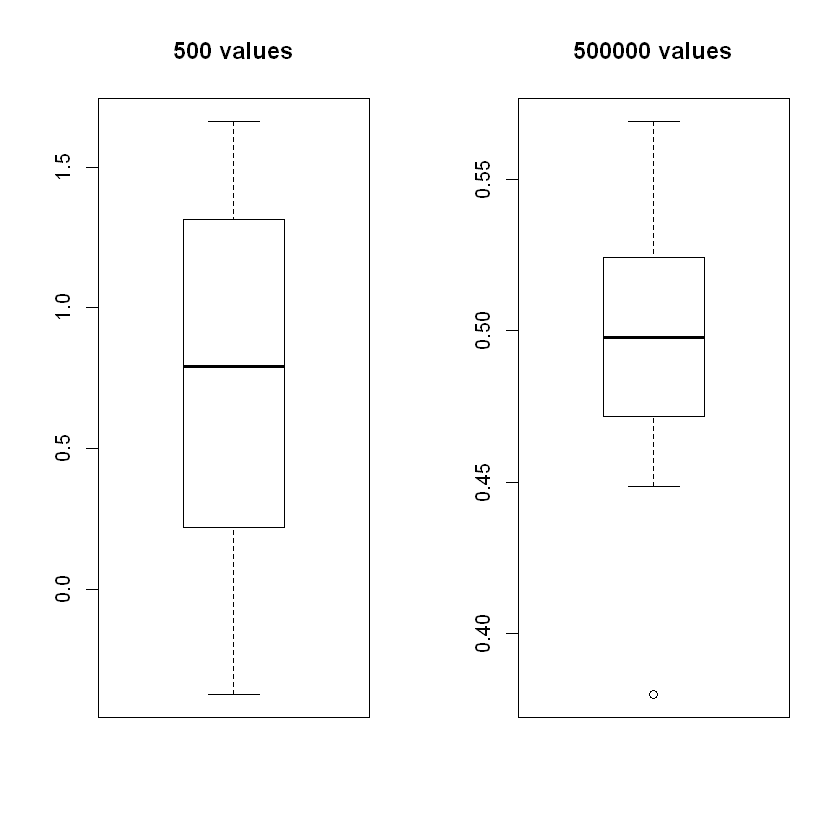

In [149]:
A <- rnorm(10,0.5,4)    #n too small to get a 0.5 as a good estimator
B <- rnorm(10000,0.5,4) #n is ok

Am<-matrix(rnorm(500,0.5,4),ncol=50)
Bm<-matrix(rnorm(500000,0.5,4),ncol=10000)

meanA<-apply(Am,1,mean)  #1 = for each row
meanB<-apply(Bm,1,mean)  #1 = for each row

# see the difference on the bar plot
par(mfrow = c(1,2))
boxplot(meanA,main = "500 values")
boxplot(meanB,main = "500000 values")


## Example 1.2 - Max(Xi) is a good estimator for uniform distribution
* simulation : A uniform distribution Unif(0,5) with 500000 observations

In [150]:
Am<-matrix(runif(500000,0,5),ncol=100)
maxA<-apply(Am,1,max)
sprintf("Estimator Max(Xi) of Theta in a Unif(0,Theta=5) distribution : %f" ,mean(maxA))
sprintf("The variance of the estimator is : %f", var(maxA))

[1] "Estimator Max(Xi) of Theta in a Unif(0,Theta=5) distribution : 4.949922"

[1] "The variance of the estimator is : 0.002454"

# Day 2

## Example 2.1 - Frequency vs density histogram

### The two histograms
* before the histogram the "summary" R function gives various information on the dataset
* for instance the fact that Mean >> Median reveal that it is not a symetric distribution
* after the graphes, the variable h$density, gives the values used in the density graph

[1] "Summary of the Dataset"

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
 0.000637  0.806842  1.848384  2.566738  3.504536 19.640304 

[1] "Values of the density"

[1] 0.2685 0.1250 0.0585 0.0290 0.0105 0.0045 0.0015 0.0015 0.0000 0.0010

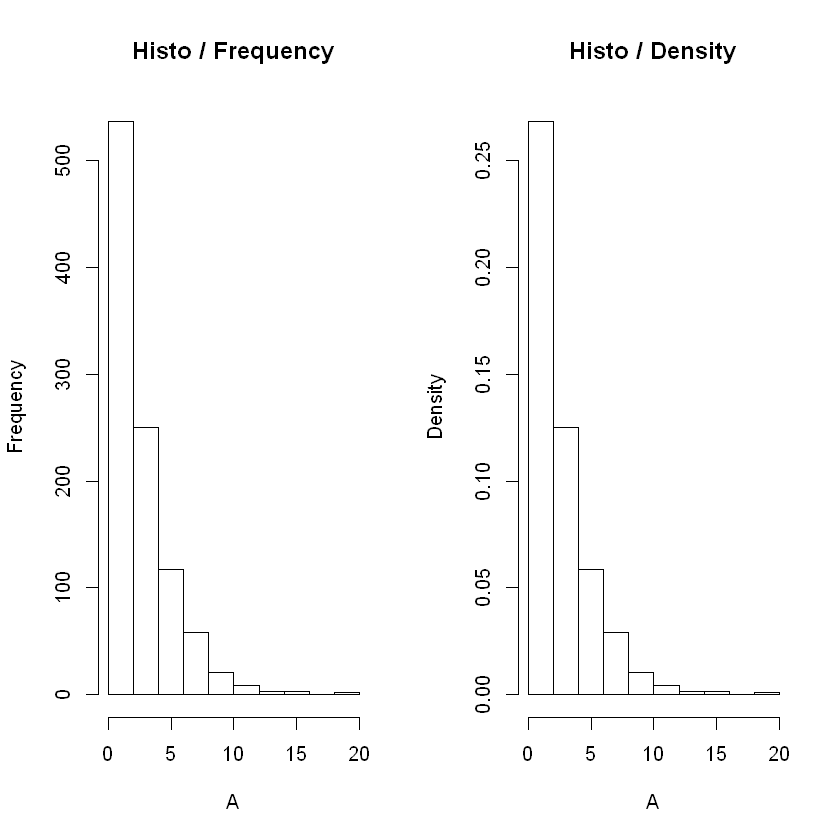

In [151]:
A=rexp(1000,0.4) # exponential distribution
sprintf("Summary of the Dataset")
summary(A) # various information on the sample
# differece between histogram frequancy / density
par(mfrow=c(1,2))
hist(A, main="Histo / Frequency") # frequency
h=hist(A,main="Histo / Density",freq=FALSE) # density
sprintf("Values of the density")
h$density # density distribution



### Case when frequency and density are not similar : non identical classes
* here the classes do not all have the same length : 1,2,1

Warning message in plot.histogram(r, freq = freq1, col = col, border = border, angle = angle, :
"the AREAS in the plot are wrong -- rather use 'freq = FALSE'"


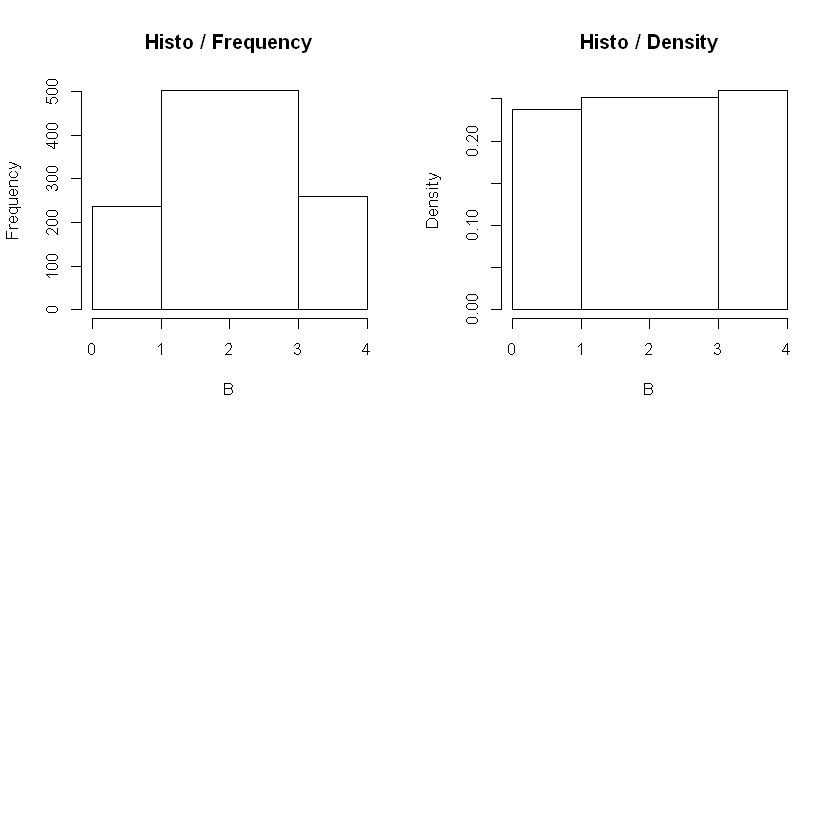

In [152]:
B=runif(1000,0,4)
par(mfrow=c(2,2))
hd=hist(B,breaks=c(0,1,3,4),freq = TRUE,main="Histo / Frequency")
hf=hist(B,breaks=c(0,1,3,4), freq = FALSE,main="Histo / Density")

## Example 2.2 - impact of size of classes on lambda calculation for exponential distribution
* Four graphes with increasing values of the size of the classes : 5, 20, 50, 100


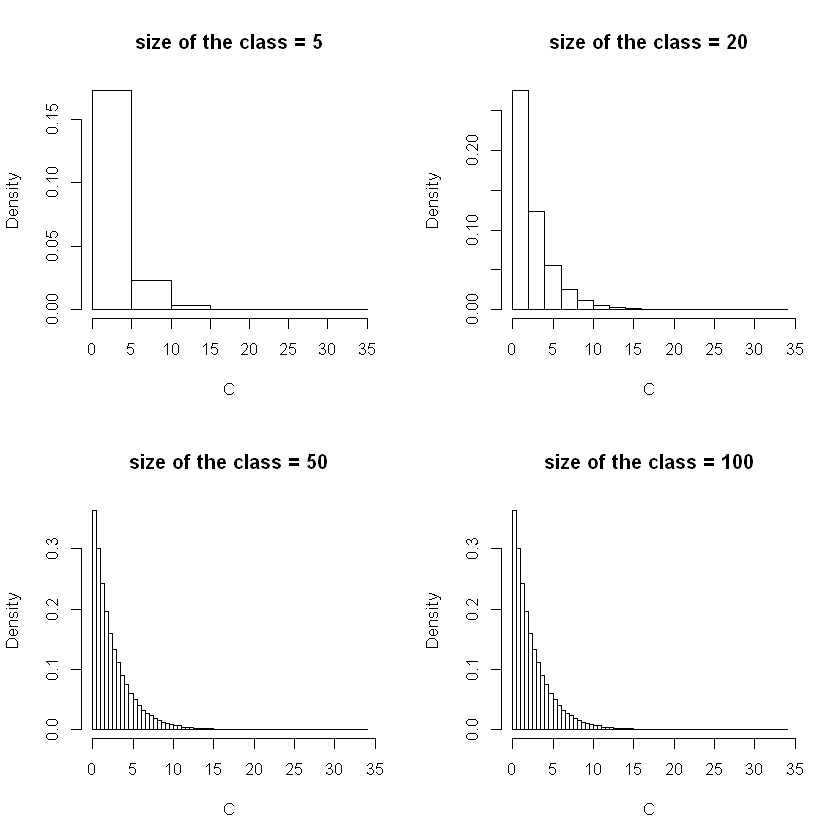

In [153]:
C=rexp(100000,0.4)
par(mfrow=c(2,2))
hist(C,breaks=5,freq=FALSE,main="size of the class = 5")
hist(C,breaks=20,freq=FALSE,main="size of the class = 20")
hist(C,breaks=50,freq=FALSE,main="size of the class = 50")
hist(C,breaks=100,freq=FALSE,main="size of the class = 100")

## Exemple 2.3 - find the lambda parameter of an exponential distribution

The simulation used is an exponential distribution with lambda = 4

### First solution : use the first value of the density vector : not a good approximation

In [154]:
A=rexp(1000,0.4)
hh=hist(A,breaks=100,plot=FALSE)
lambda_1 = hh$density[1] # density distribution - the first element of hh$density is an approximation of the estimator but ....
sprintf("First value of density vector : lambda = %f", lambda_1)


[1] "First value of density vector : lambda = 0.365000"

### Better solution : lambda_2 = 1 / mean(dataset) <- moment methods

In [155]:
A=rexp(1000,0.4)
lambda_2 = 1/mean(A)

sprintf("Moment methode : lambda_2 = %f", lambda_2)


[1] "Moment methode : lambda_2 = 0.377638"

### Impact of the number of observation on the calcul of 1/mean(A) with A an exponential distribution
* in red the approximation of lambda using 1/mean(A)
* in blue the real value of lambda = 0.4

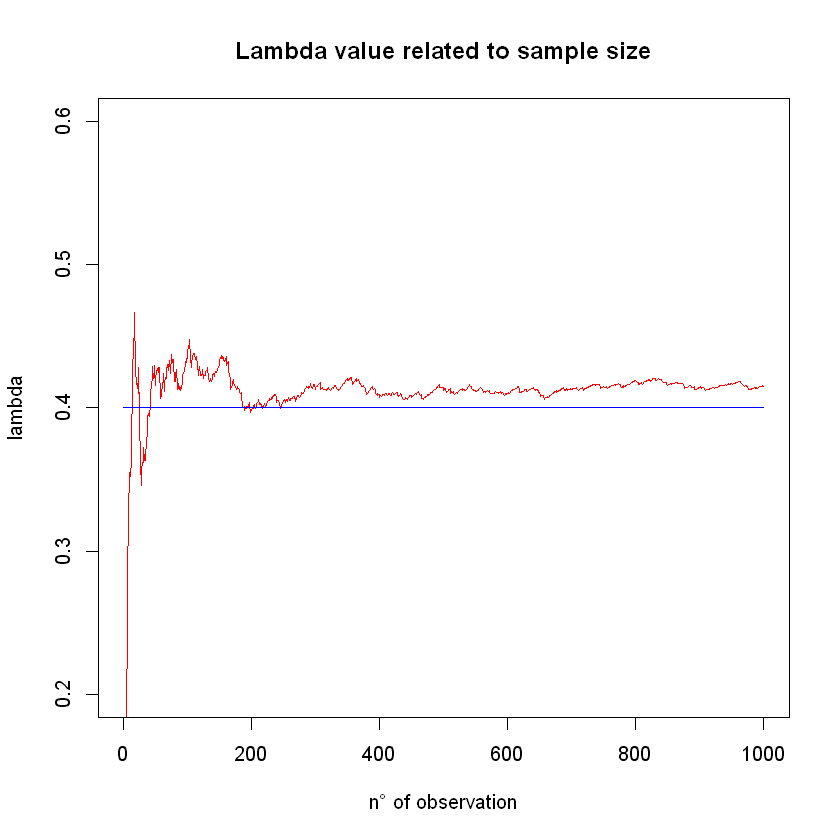

In [156]:
A=rexp(1000,0.4)
#length(A) # number of values in A
sumx=cumsum(A) # x1, x1+x2,x1+x2+x3 ...to calculate meanA for 1,2,3 ... element
barx=sumx/1:1000 # division a vector by a vector - division terme by term
esti_lambda = 1 / barx
par(mfrow=c(1,1))
plot(1:1000,esti_lambda,type='l',col='red',xlim=c(0,1001),ylim=c(0.2,0.6),main="Lambda value related to sample size",xlab="n° of observation",ylab="lambda") # evolution of lambda estimation in fn of sample size
par(new=TRUE)
plot(c(0,1000),c(0.4,0.4),type='l',col='blue',xlim=c(0,1001),ylim=c(0.2,0.6),xlab="",ylab="") # in blue the "real" value



## Example 2.4 - 3 distribution graphes
* exponential distribution
* normal distribution
* uniforme distribution

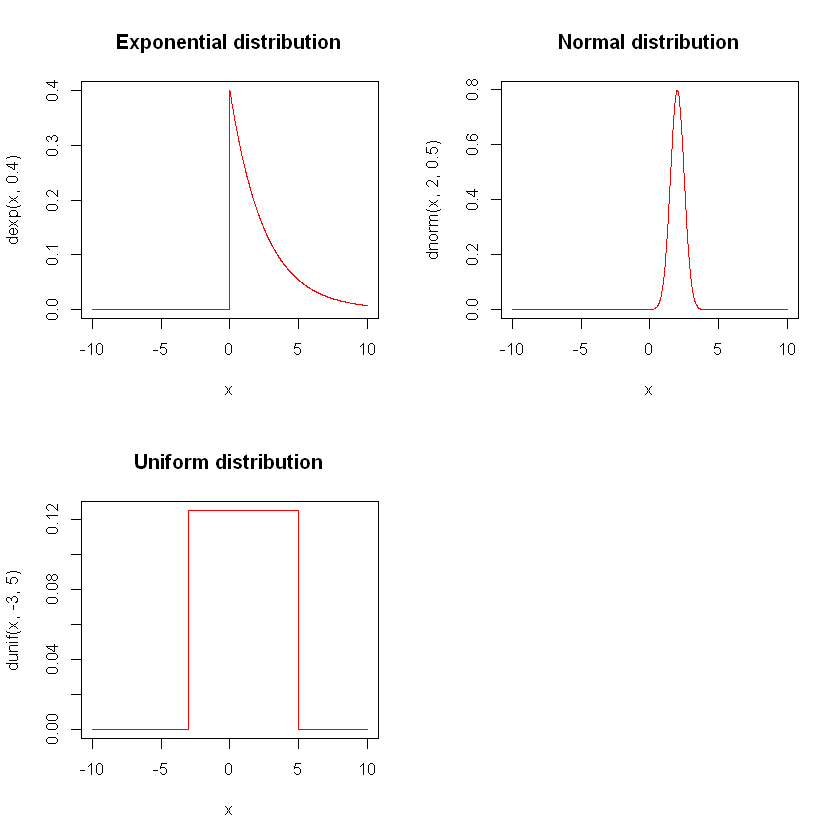

In [157]:
par(mfrow=c(2,2))
x=seq(-10,10,0.01)
plot(x,dexp(x,0.4),type='l',col='red',main="Exponential distribution") # exponential distribution
plot(x,dnorm(x,2,0.5),type='l',col='red',main="Normal distribution") # normal distribution
plot(x,dunif(x,-3,5),type='l',col='red',main="Uniform distribution") # uniform distribution

# Day 3
## Exemple 3.1 - Difference of distribution between Gaussian and Student
* Gaussian (normal distibution) in red
* Student (number of degree of liberty 2) in blue

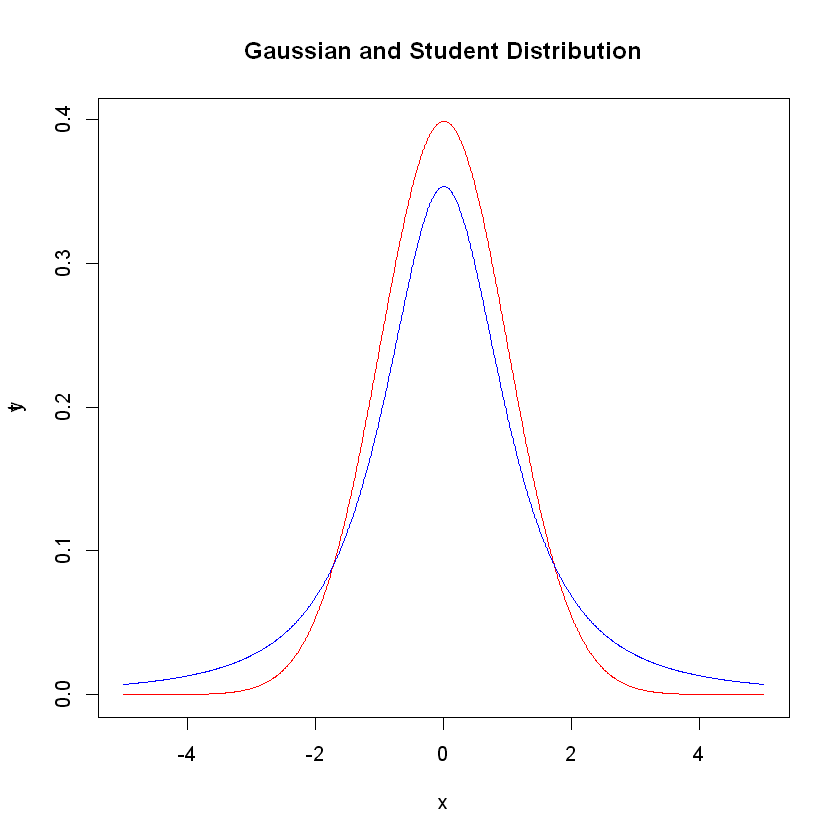

In [158]:

x=seq(-5,5,0.01)
y=dnorm(x)
t=dt(x,2)
maxy=max(y,t)
plot(x,y,type='l',col='red',xlim=c(-5,5),ylim=c(0,maxy),main="Gaussian and Student Distribution")
par(new=TRUE)
plot(x,t,type='l',col='blue',xlim=c(-5,5),ylim=c(0,maxy))


## Example 3.2 - using R to compute Gaussian and Student Probabilies
    * pnorm (Gaussian), pt (Student) to get a probability knowing a value for the R.V
    * qnorm (Gaussian), qt (Student) to get a R.V value knowing the probability
    * take care, pnorm/qnorm use standard deviation and not variance as third parameter

In [159]:
# P(-0.28 <= Z <= 0.57)
sprintf ("P(-0.28 <= Z <= 0.57) for N(0,1) = %f" , pnorm(0.57)-pnorm(-0.28))
sprintf ("P(-0.2 <= Z <= 1.2) for N(1,4) = %f" , pnorm(1.2,1,2)-pnorm(-0.2,1,2))

sprintf ("P(-0.271 <= Z <= 0.271) for T(4) = %f" , pt(0.271,4)-pt(-0.271,4))
sprintf ("P(0,414 <= Z <= 1.19) for T(4) = %f" , pt(1.19,4)-pt(0.414,4))

sprintf ("t so that P( Z <= t) = 0,95 for N(0,1), t = %f" , qnorm(0.95))
sprintf ("t so that P( Z <= t) = 0,95 for N(1,4), t = %f" , qnorm(0.95,1,2))


[1] "P(-0.28 <= Z <= 0.57) for N(0,1) = 0.325922"

[1] "P(-0.2 <= Z <= 1.2) for N(1,4) = 0.265575"

[1] "P(-0.271 <= Z <= 0.271) for T(4) = 0.200199"

[1] "P(0,414 <= Z <= 1.19) for T(4) = 0.200131"

[1] "t so that P( Z <= t) = 0,95 for N(0,1), t = 1.644854"

[1] "t so that P( Z <= t) = 0,95 for N(1,4), t = 4.289707"

## Example 3.3 - Compare Student distribution when the degree of freedom is changing
* comparaison with 2,4 and 10 degree of freedom

[1] "value for which Probability for Student T(2) = 0.95 :  t= 1.885618"

[1] "value for which Probability for Student T(2) = 0.95 :  t= 1.533206"

[1] "value for which Probability for Student T(2) = 0.95 :  t= 1.372184"

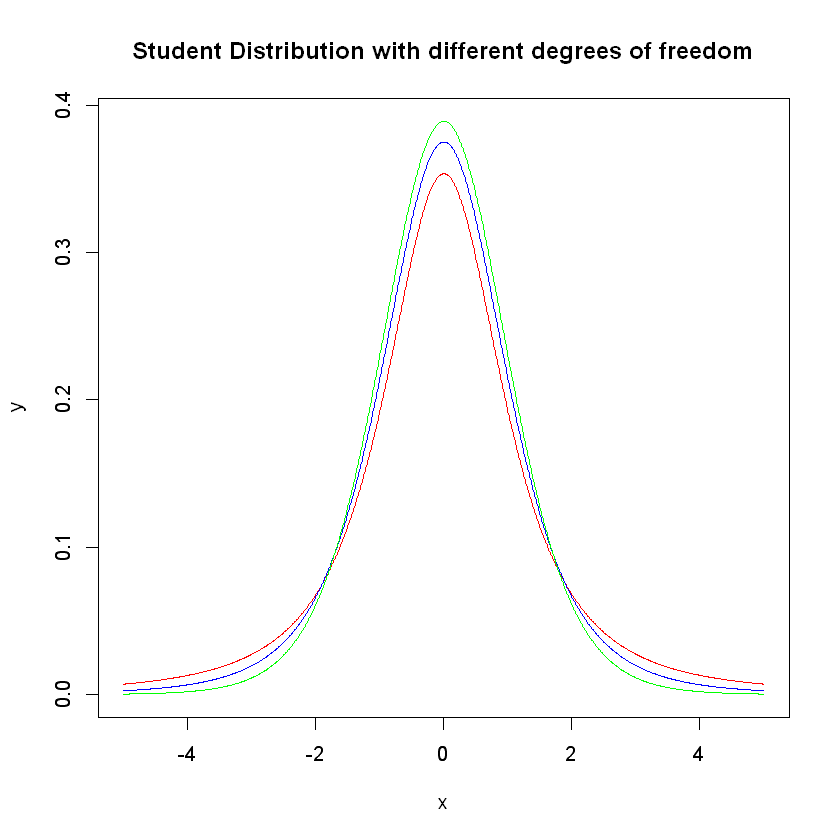

In [160]:
x=seq(-5,5,0.01)
y2=dt(x,2)
y4=dt(x,4)
y10=dt(x,10)
maxy=max(y2,y4,y10)
plot(x,y2,type='l',col='red',xlim=c(-5,5),ylim=c(0,maxy),ylab="y",main="Student Distribution with different degrees of freedom")
par(new=TRUE)
plot(x,y4,type='l',col='blue',xlim=c(-5,5),ylim=c(0,maxy),xlab="",ylab="")
par(new=TRUE)
plot(x,y10,type='l',col='green',xlim=c(-5,5),ylim=c(0,maxy),xlab="",ylab="")
sprintf("value for which Probability for Student T(2) = 0.95 :  t= %f",qt(0.9,2))
sprintf("value for which Probability for Student T(2) = 0.95 :  t= %f",qt(0.9,4))
sprintf("value for which Probability for Student T(2) = 0.95 :  t= %f",qt(0.9,10))


## Exemple 3.4 - Showing that the Mean of a dataset can be outside of the calculated Confidence Interval
* but with a probability linked to the choice of alpha
* in the example, the simulation is a Normal distribution (mu=1,sd=2) and alpha = 0.05
* we suppose that the variance = 4 is known
* we run the simulation 100 times and check the number of times that mu is out of the calculated CI

In [161]:
#if you run it several times, you can have mu out of CI 
K=100
M=matrix(data=0,ncol=2,nrow=K) # one CI by row
for (i in 1:K)
{
  data=rnorm(1000,2,1) # normal mu=2 sd= 1
  # alpha = 5%, sd is known
  lowerbound = mean(data)-1/sqrt(1000)*qnorm(0.975)
  upperbound = mean(data)+1/sqrt(1000)*qnorm(0.975)
  CI =c(lowerbound,upperbound)
  M[i,]=CI
}
#M # we should have at most 5% of cases where mu outside of CI# counting when we are outside
B=(M[,1]>2)+(M[,2]<2)
sprintf("mu is out of CI %i times over %i. The maximum should be : %i times",sum(B),K,5) #number of sample where mu out of CI




[1] "mu is out of CI 6 times over 100. The maximum should be : 5 times"

## Example 3.5 - Is Max(Xi) a good approximation for N in a Binomail distribution(N,p) (as it is for Uniform Distribution)
* we simulate 10000 Binomial distribution sample (10,p) for p=0.8 and p=0.2
* for p=0.8, the Max(Xi) estimator is good (very close to 10)
* for p=0.2, the Max(Xi) estimator is not good
* the estimator is not good for p=0.2 because the probability to have a 10 value among the 10000 observations is very low

In [162]:
#binomial
D1=rbinom(10000,10,0.8) # N=10
sprintf("estimator of N (=10) for Binomial(10,0.8) : %f - very good",max(D1)) # ok
D2=rbinom(10000,10,0.2)
sprintf("estimator of N (=10) for Binomial(10,0.2) : %f - not good",max(D2)) # ok
sprintf("Probability to reach to have a sample = 10 with p=0.2 is very low : %f",0.2^10*10000) # ok


[1] "estimator of N (=10) for Binomial(10,0.8) : 10.000000 - very good"

[1] "estimator of N (=10) for Binomial(10,0.2) : 7.000000 - not good"

[1] "Probability to reach to have a sample = 10 with p=0.2 is very low : 0.001024"

# Day 4
## Preparing the data

In [ ]:
getwd() # folder used at the moment
# to modify the default header : setwd
setwd('C:/Users/erick/OneDrive - Data ScienceTech Institute/course/FMSL2')

dir() # to see the content of the current directory

### use of read.table to read a file
* data1 is a data.frame (works as a list)
* use "header=TRUE or header = FALSE" depending if you have header in the file
* in our case there is no header => header = FALSE
* argument "set=" to fixe separator. For instance set=";" for a ";" separator
* in R by default the "." is used as a decimal separator. To change it dec = ','

In [231]:
data1 <- read.table("C:\\Users\\erick\\OneDrive - Data ScienceTech Institute\\course\\FSML2\\data1.txt", header = FALSE, sep = ",")
head(data1) # check that data's are ok

,V1
,<dbl>
1,0.5792213
2,1.7901780
3,0.3182912
4,1.5247270
5,2.2034720
6,0.5783241


To access the datas within the data1 data.frame

In [173]:
data1[1,]

[1] 0.5792213

Get the size of the dataset

In [170]:
dim(data1)

[1] 5000    1

Available dataset in R : iris database
* help("iris") : gives detailled information on the dataset

In [175]:
head(iris)
help("iris")

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


We have a quantitative variable and continuous
* the histogramme will be the correct representation
* as.matrix() transform the object into a matrix

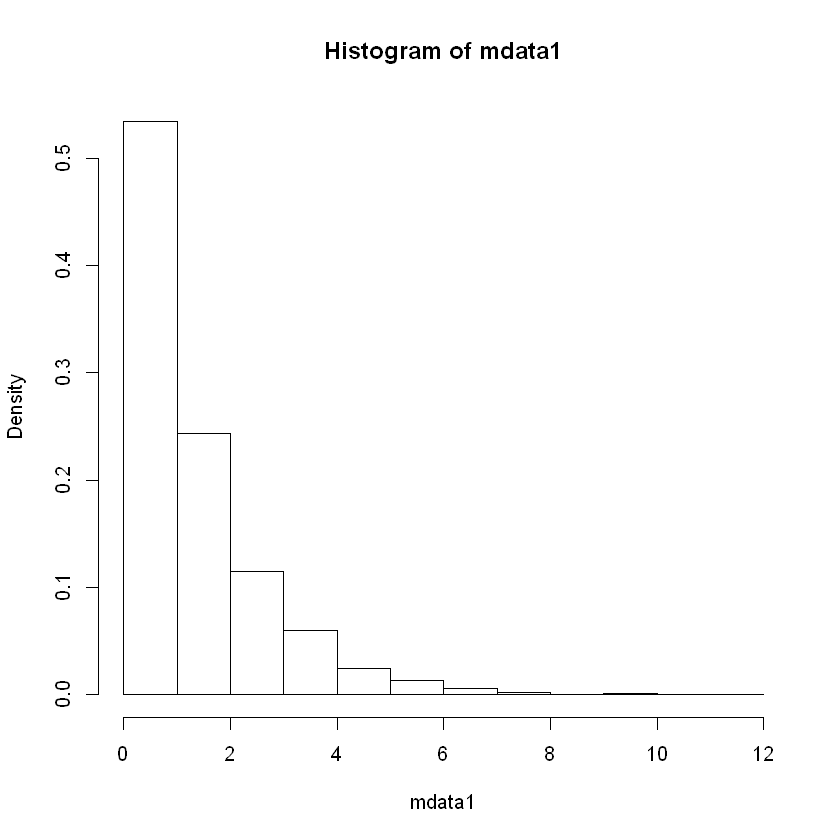

In [233]:
mdata1 = as.matrix(data1)
hist(mdata1,freq = FALSE)




We guess that it can be an exponential distribution
* we need to estimate the parameter
* by method of moments : lambda = 1/mean(Xi)

In [179]:
lambda_1 = 1/mean(mdata1) # lambda 0.758
sprintf("An estimator lambda = %f",lambda_1)


[1] "An estimator lambda = 0.757914"

Compare Theory and Practice

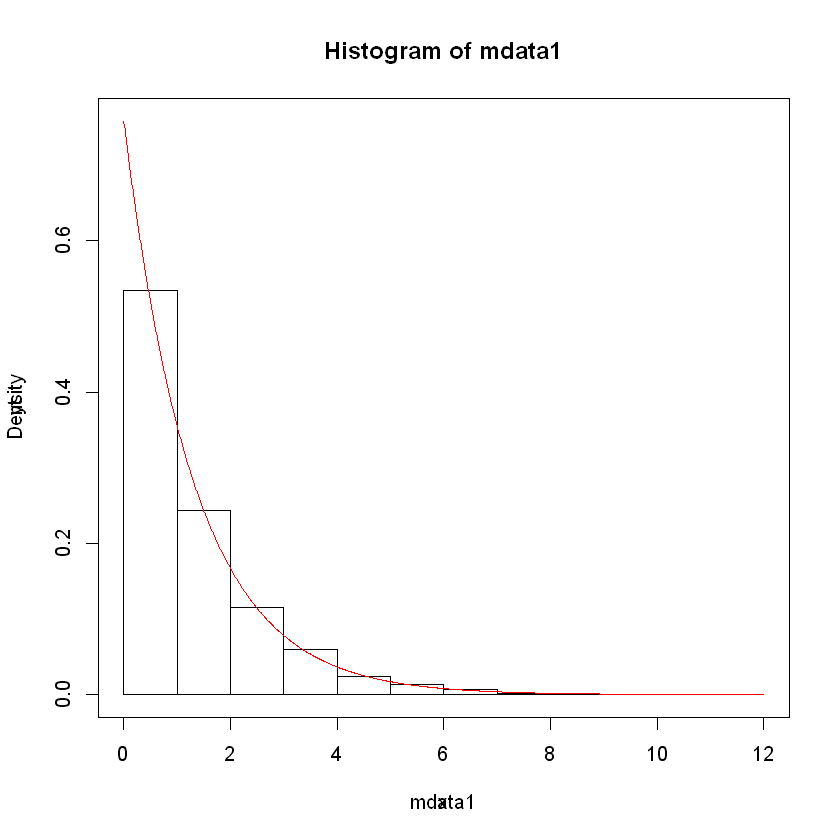

In [234]:
H=hist(mdata1,plot=FALSE)
limits = H$breaks
infl=min(limits)
subl=max(limits)
x=seq(infl,subl,0.01) #step small enough to have something smooth
yt=dexp(x,lambda_1)
yh=h$density
ymax=max(yt,yh)
hist(mdata1,freq=FALSE,xlim=c(infl,subl),ylim=c(0,ymax))
par(new=TRUE)
plot(x,yt,type='l',col='red',xlim=c(infl,subl),ylim=c(0,ymax)) # exponential distribution



split two first classes and group the last ones

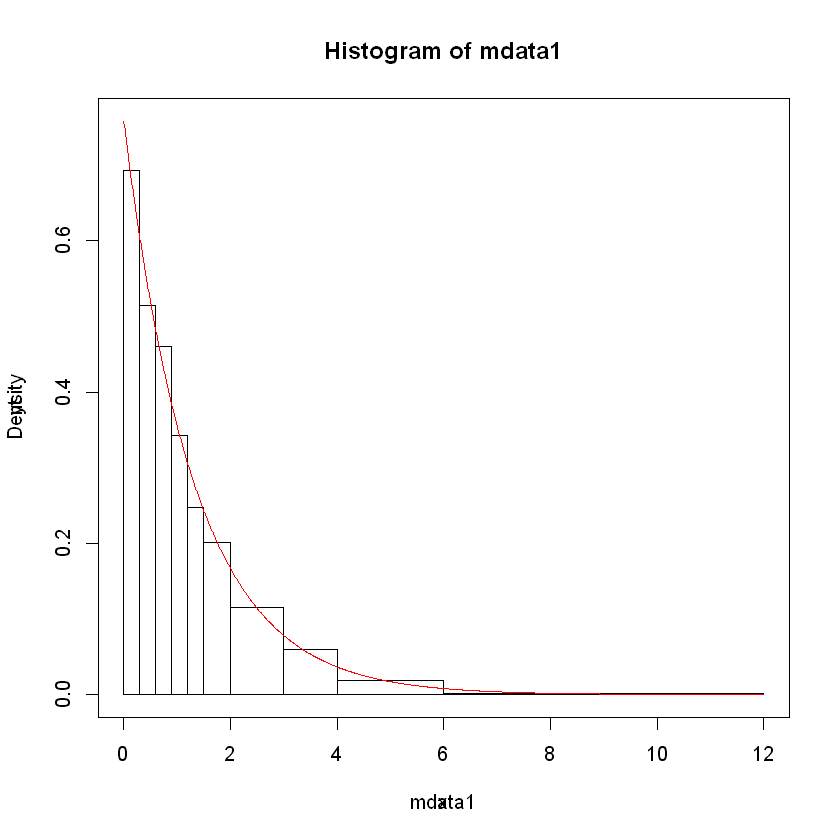

In [236]:
H=hist(mdata1,plot=FALSE)
limits = H$breaks
infl=min(limits)
subl=max(limits)
x=seq(infl,subl,0.01) #step small enough to have something smooth
yt=dexp(x,lambda_1)
yh=h$density
ymax=max(yt,yh)
hist(mdata1,breaks=c(0,0.3,0.6,0.9,1.2,1.5,2,3,4,6,12),freq=FALSE,xlim=c(infl,subl),ylim=c(0,ymax))
par(new=TRUE)
plot(x,yt,type='l',col='red',xlim=c(infl,subl),ylim=c(0,ymax)) # exponential distribution


##data2

In [ ]:
discrete values => barplot
* the table function : count the occurences of each value / number of observation


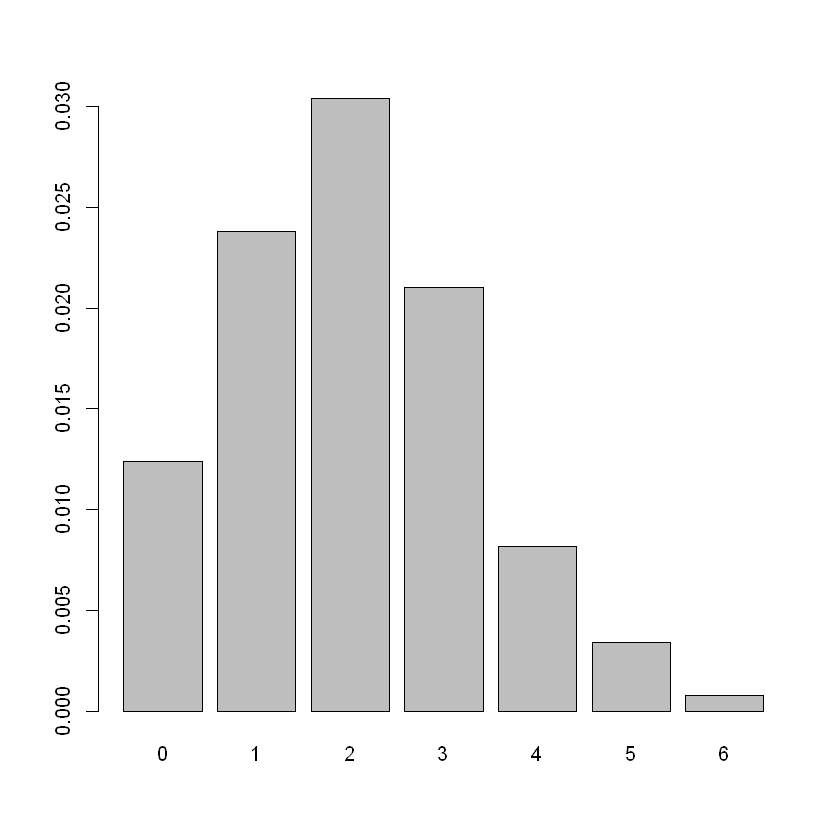

In [199]:
# dataset 2
data2 <- read.table("C:\\Users\\erick\\OneDrive - Data ScienceTech Institute\\course\\FSML2\\data2.txt", header = FALSE, sep = ",")
count=table(data2)
mdata2 = as.matrix(data2)
barplot(count / 5000)


Modelisation : it looks like a Binomial or Poison Distribution

Start with Poisson to see ..
* by method of moment : an estimator is empirical mean
If Binomial
* by method of moment :
* p = (mu-var)/mu, 
* N=mu^2/(mu-var) - take care, N must be an insteger


In [213]:
lambda_p = mean(as.matrix(data2)) # an estimation - associated value to an estimator
lambda_p

p_p = (mean(mdata2)-var(mdata2))/mean(mdata2)
N_p = mean(mdata2)/p_p # must be an integer
count
# because N is an integer the estimation should be an integer also
#N_p = 13 => adapt p_p
N_p = 13
p_p = mean(mdata2)/N_p
p_p


[1] 2.022

data2
  0   1   2   3   4   5   6 
 62 119 152 105  41  17   4 

[1] 0.1555385

We do graphical superposition to choose between Poison and Binomial and compare the theory with the given dataset data2

[1] 0.1555385

[1] 13

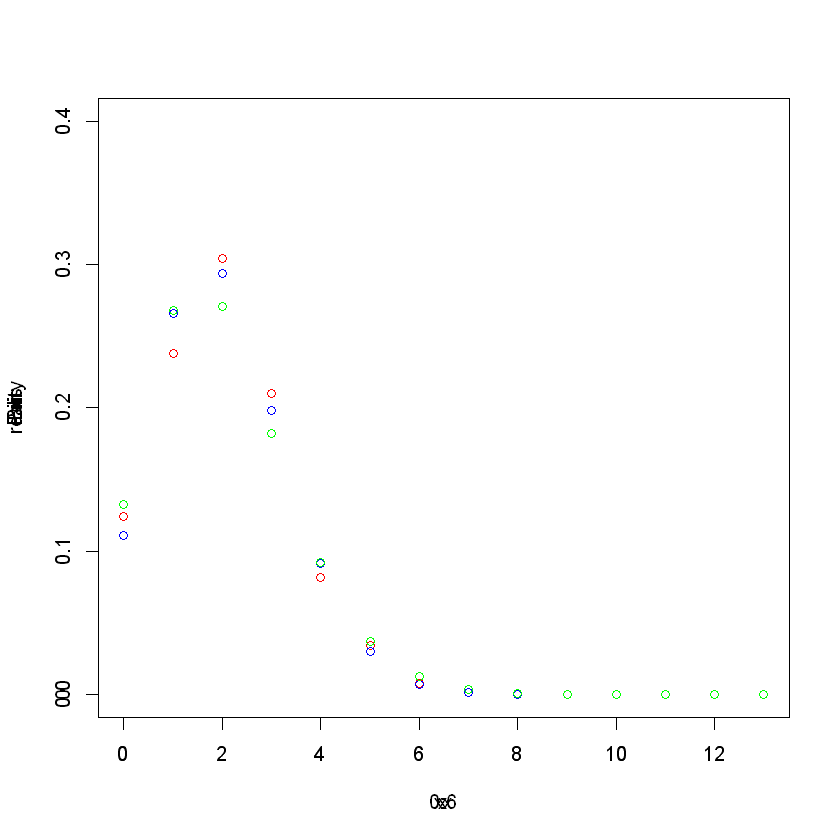

In [226]:
p_p
N_p
reality = count/500
#barplot(count / 5000)
plot(0:6,reality,col='red',type='p',xlim=c(0,13),ylim=c(0,0.4))

xx=0:N_p
par(new=TRUE)
Bin = dbinom(xx,N_p,p_p)
count_bin = table(Bin)
#barplot(count_bin / 5000, col = 'red')
plot(xx,Bin,col='blue',type='p',xlim=c(0,13),ylim=c(0,0.4))

par(new=TRUE)
x=0:13
Pois = dpois(x,lambda_p)
count_pois = table(Pois)
#barplot(count_pois / 5000, col = 'blue')
plot(x,Pois,col='green',type='p',xlim=c(0,13),ylim=c(0,0.4))




Blue = Binomial is closer to the dataset in Red, So we choose the Binomial Distribution with p = 0.1555 and N = 13

Difficult to choose between Poison and Binomial because Poison can be an approximation of Binomial

Practicaly, it is easely to use Poison (one parameter) than Binomial (two parameters)

## data3

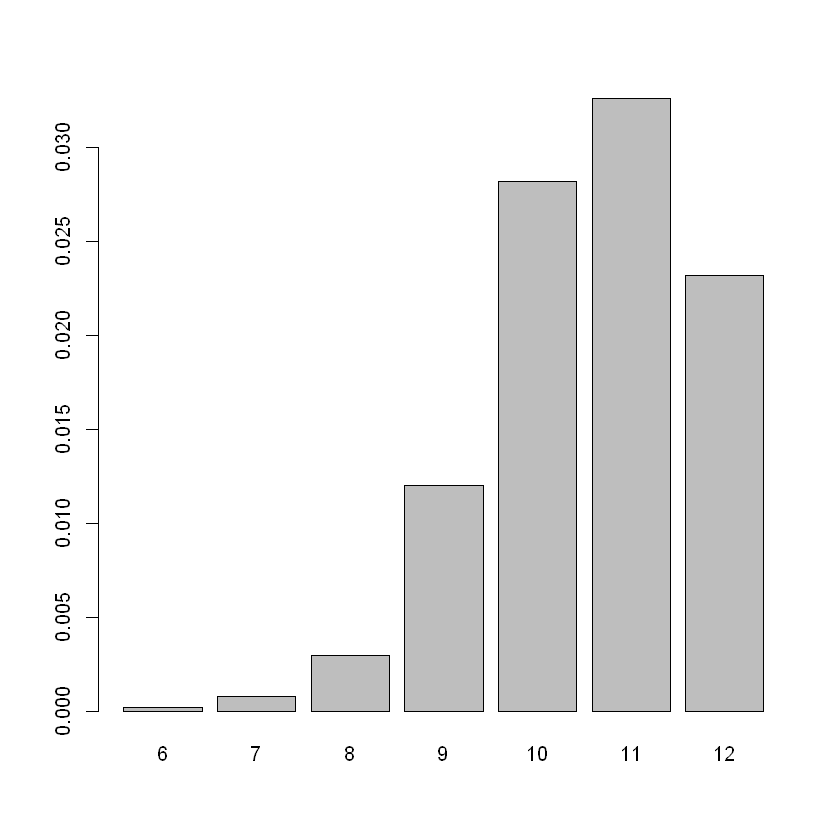

In [227]:
# dataset 3
data3 <- read.table("C:\\Users\\erick\\OneDrive - Data ScienceTech Institute\\course\\FSML2\\data3.txt", header = FALSE, sep = ",")
count3=table(data3)
mdata3 = as.matrix(data3)
barplot(count3 / 5000)

Poisson and binomial ?

In [ ]:
lambda_p3 = mean(as.matrix(data3)) # an estimation - associated value to an estimator
lambda_p3

p_p3 = (mean(mdata3)-var(mdata3))/mean(mdata3)
N_p3 = mean(mdata3)/p_p # must be an integer
count
# because N is an integer the estimation should be an integer also
#N_p = 13 => adapt p_p
N_p3 = 13
p_p3 = mean(mdata2)/N_p
p_p3


To be sure that we have numerical values => try to add two values

In [189]:
x<-sample(1:10,50,replace=TRUE) # 
x
xf=as.factor(x)
xf # here level = categorical
xf[4]+xf[1]

[1] 10  9  7  1  4  7  7  5  1  3  7  8  2  7  3  2 10  9  2 10 10 10  3  2  7
[26]  6  5  2  7  9  5  9 10  4  3  7  6  4  3 10  5  8  5  1  3  3  2  3  1  1

[1] 10 9  7  1  4  7  7  5  1  3  7  8  2  7  3  2  10 9  2  10 10 10 3  2  7 
[26] 6  5  2  7  9  5  9  10 4  3  7  6  4  3  10 5  8  5  1  3  3  2  3  1  1 
Levels: 1 2 3 4 5 6 7 8 9 10

Warning message in Ops.factor(xf[4], xf[1]):
"'+' not meaningful for factors"


[1] NA